<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Business Challenge #2</h1>
<h4>Business Challenge #2</h4>
Team - 5<br>
Artur Leao de Menezes Lobao - MBAN
<br>
Tamiris Palácios - MBAN
<br>

Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part I: Preparation and Exploration</h2>
<br><h4>a) Imports and Loading the Dataset</h4><br>
<strong>train</strong> (from the <em>__datasets</em> folder).

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting for classification
from sklearn.ensemble import RandomForestClassifier      # Random Forest for Classification
import time              # to check the time of execution

start_time = time.time() 


train_file = './__datasets/train.csv'
train = pd.read_csv(train_file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)




In [2]:
########################################
# visual_cm - Code taken from class, to create a visual model of
# Matrix confusion that will be used later in the Project
########################################
def visual_cm( model_name,true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
model_name : Name of the model
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix of the Classifier {model_name}')
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In the next step, analyze the variables present in the database

In [3]:
# displaying the head of the dataset
train.head(n = 5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# INFOrmation about each variable
train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#count of unique values
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [7]:
#count of null values
train.isnull().sum(axis = 0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Code from:

https://medium.com/swlh/ways-to-handle-continous-column-missing-data-its-implementations-4704f52ac9c3

In [8]:
# function use to impute_nan values with mean/median/mode
def impute_nan(DataFrame, ColumnName, ImputeValue):
    DataFrame[ColumnName + "_Imputed"] = DataFrame[ColumnName].fillna(ImputeValue)


In [9]:
# Call function to impute median value
median = train.Age.median()
impute_nan(train, 'Age', median)

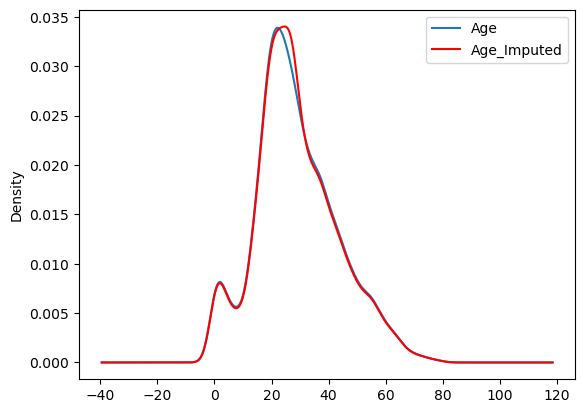

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['Age'].plot(kind='kde', ax=ax)
train['Age_Imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [11]:
#RoomService
# Call function to impute median value
median = train.RoomService.median()
impute_nan(train, 'RoomService', median)

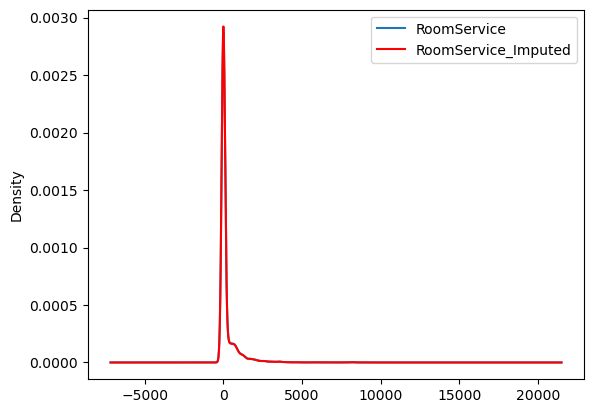

In [12]:
#RoomService
fig = plt.figure()
ax = fig.add_subplot(111)
train['RoomService'].plot(kind='kde', ax=ax)
train['RoomService_Imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [13]:
#FoodCourt
# Call function to impute median value
median = train.FoodCourt.median()
impute_nan(train, 'FoodCourt', median)

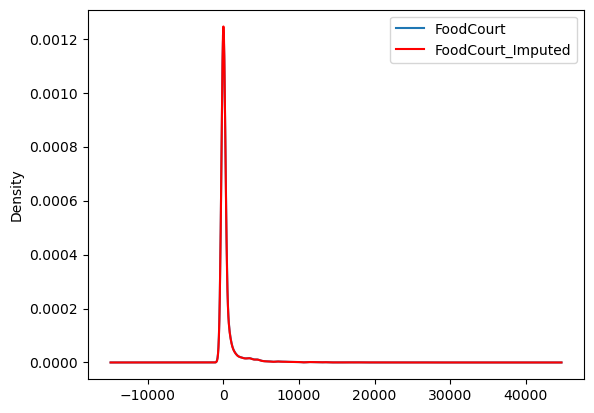

In [14]:
#FoodCourt
fig = plt.figure()
ax = fig.add_subplot(111)
train['FoodCourt'].plot(kind='kde', ax=ax)
train['FoodCourt_Imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [15]:
#ShoppingMall
# Call function to impute median value
median = train.ShoppingMall.median()
impute_nan(train, 'ShoppingMall', median)

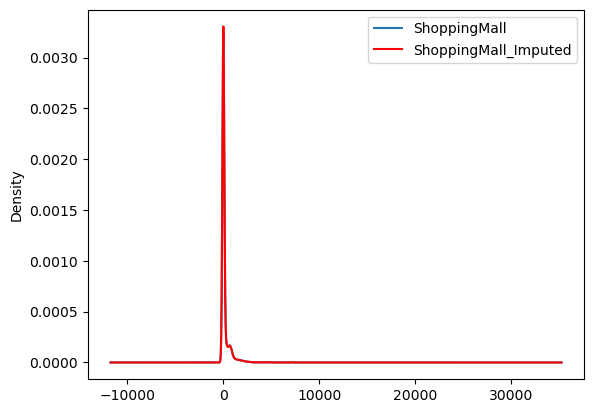

In [16]:
#ShoppingMall
fig = plt.figure()
ax = fig.add_subplot(111)
train['ShoppingMall'].plot(kind='kde', ax=ax)
train['ShoppingMall_Imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [17]:
#Spa
# Call function to impute median value
median = train.Spa.median()
impute_nan(train, 'Spa', median)

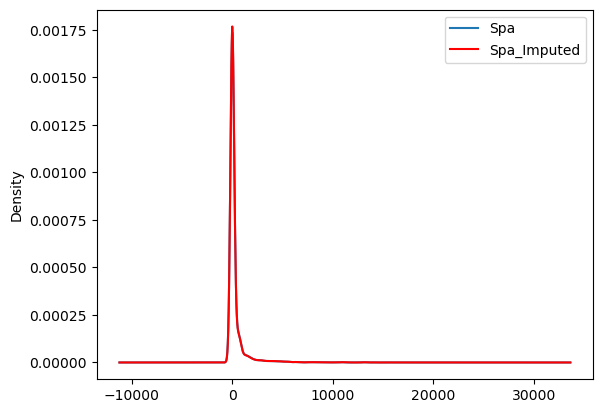

In [18]:
#Spa
fig = plt.figure()
ax = fig.add_subplot(111)
train['Spa'].plot(kind='kde', ax=ax)
train['Spa_Imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
#VRDeck
# Call function to impute median value
median = train.VRDeck.median()
impute_nan(train, 'VRDeck', median)

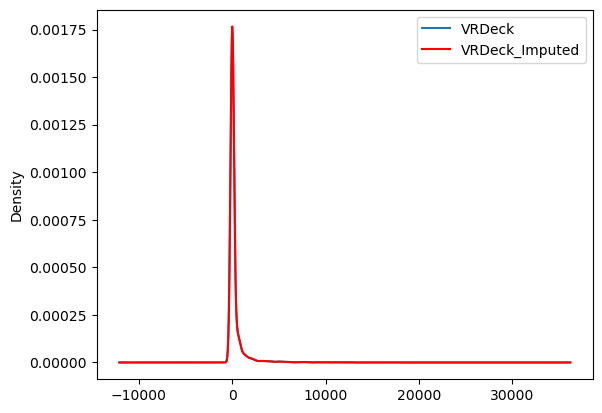

In [20]:
#VRDeck
fig = plt.figure()
ax = fig.add_subplot(111)
train['VRDeck'].plot(kind='kde', ax=ax)
train['VRDeck_Imputed'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [21]:
continous_variables = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
median = train[continous_variables].median()
median

Age             27.0
RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
dtype: float64

In [22]:
train[continous_variables] = train[continous_variables].fillna(median)
train.isna().sum()

PassengerId               0
HomePlanet              201
CryoSleep               217
Cabin                   199
Destination             182
Age                       0
VIP                     203
RoomService               0
FoodCourt                 0
ShoppingMall              0
Spa                       0
VRDeck                    0
Name                    200
Transported               0
Age_Imputed               0
RoomService_Imputed       0
FoodCourt_Imputed         0
ShoppingMall_Imputed      0
Spa_Imputed               0
VRDeck_Imputed            0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Filling with most occurring class

In [23]:
categorical_variables = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
mode = train[categorical_variables].mode().iloc[0]

In [24]:
train[categorical_variables] = train[categorical_variables].fillna(mode)
train.isna().sum()

PassengerId               0
HomePlanet                0
CryoSleep                 0
Cabin                     0
Destination               0
Age                       0
VIP                       0
RoomService               0
FoodCourt                 0
ShoppingMall              0
Spa                       0
VRDeck                    0
Name                    200
Transported               0
Age_Imputed               0
RoomService_Imputed       0
FoodCourt_Imputed         0
ShoppingMall_Imputed      0
Spa_Imputed               0
VRDeck_Imputed            0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Filling with unknown class

In [25]:
# categorical_variables = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]


In [26]:
# train[categorical_variables] = train[categorical_variables].fillna("Unknown")
# train.isna().sum()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [27]:
train = train.drop("Name", axis=1)
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Imputed,RoomService_Imputed,FoodCourt_Imputed,ShoppingMall_Imputed,Spa_Imputed,VRDeck_Imputed
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,39.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,24.0,109.0,9.0,25.0,549.0,44.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,58.0,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,33.0,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,16.0,303.0,70.0,151.0,565.0,2.0


In [28]:
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split("/", expand = True) #from the File and Data Field Descriptions
                                                                              #side can be either P for Port or S for Starboard.
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Imputed,RoomService_Imputed,FoodCourt_Imputed,ShoppingMall_Imputed,Spa_Imputed,VRDeck_Imputed,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,39.0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,24.0,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,58.0,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,33.0,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,16.0,303.0,70.0,151.0,565.0,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,41.0,0.0,6819.0,0.0,1643.0,74.0,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,18.0,0.0,0.0,0.0,0.0,0.0,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,26.0,0.0,0.0,1872.0,1.0,0.0,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,32.0,0.0,1049.0,0.0,353.0,3235.0,E,608,S


In [29]:
train = train.drop("Cabin", axis=1)
train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Imputed,RoomService_Imputed,FoodCourt_Imputed,ShoppingMall_Imputed,Spa_Imputed,VRDeck_Imputed,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,39.0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,24.0,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,58.0,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,33.0,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,16.0,303.0,70.0,151.0,565.0,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,41.0,0.0,6819.0,0.0,1643.0,74.0,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,18.0,0.0,0.0,0.0,0.0,0.0,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,26.0,0.0,0.0,1872.0,1.0,0.0,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,32.0,0.0,1049.0,0.0,353.0,3235.0,E,608,S


In [30]:
# A succinct way to convert a single column of boolean values to a column of integers 1 or 0:
# from:https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
True_False = ['CryoSleep','VIP','Transported']
train[True_False] = train[True_False].astype(int)
train.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Imputed,RoomService_Imputed,FoodCourt_Imputed,ShoppingMall_Imputed,Spa_Imputed,VRDeck_Imputed,Deck,Num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,39.0,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,24.0,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,58.0,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,33.0,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,16.0,303.0,70.0,151.0,565.0,2.0,F,1,S


In [31]:
train = train.drop(["Age_Imputed","RoomService_Imputed","FoodCourt_Imputed","ShoppingMall_Imputed","Spa_Imputed","VRDeck_Imputed"], axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [32]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CryoSleep,8693.0,0.349362,0.476796,0.0,0.0,0.0,1.0,1.0
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
VIP,8693.0,0.022892,0.149568,0.0,0.0,0.0,0.0,1.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Transported,8693.0,0.503624,0.500016,0.0,0.0,1.0,1.0,1.0


In [33]:
#name of the columns
for col in train.columns:
    print(col)

PassengerId
HomePlanet
CryoSleep
Destination
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported
Deck
Num
Side


<AxesSubplot: >

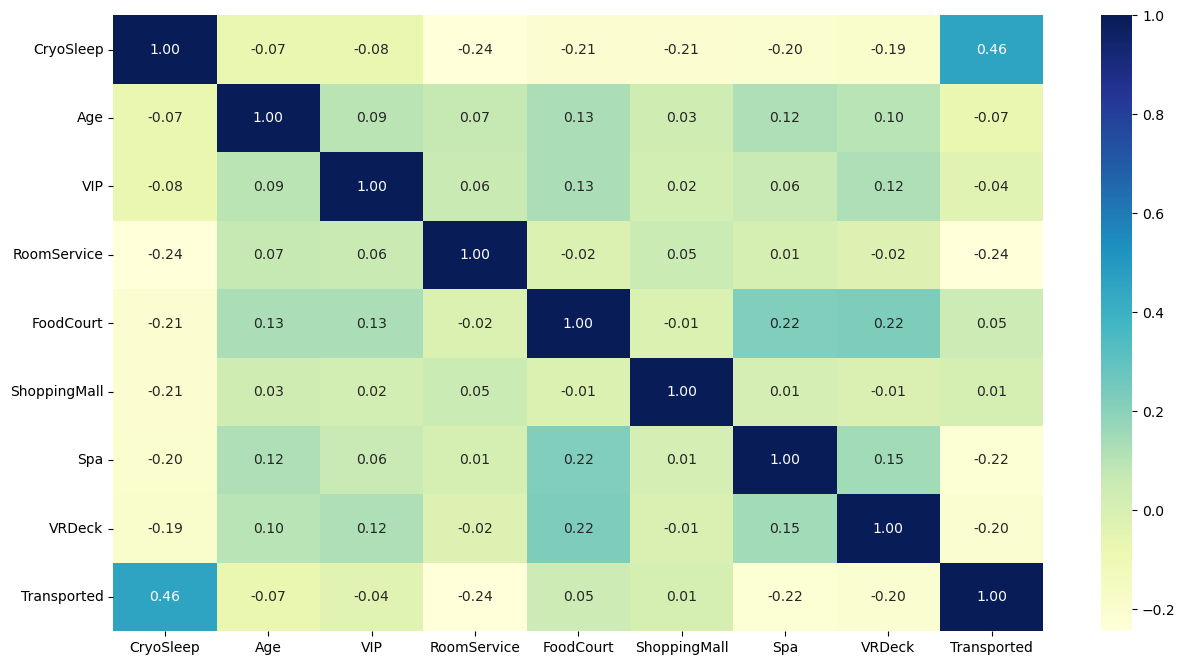

In [34]:
# code here
Col_heat_map = ['CryoSleep','Age','VIP','RoomService',
           'FoodCourt','ShoppingMall','Spa',
           'VRDeck','Transported']
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))

sns.heatmap(train[Col_heat_map].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')



In [35]:
numeric_columns = ['Transported','CryoSleep','FoodCourt','ShoppingMall', 'VIP','Age' ,'VRDeck' ,'Spa','RoomService']

In [36]:
df_corr = train.corr(method = 'pearson').round(decimals=2)

df_corr['Transported'].sort_values(ascending = False)

C:\Users\artur\AppData\Local\Temp\ipykernel_20048\2349117319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = train.corr(method = 'pearson').round(decimals=2)


Transported     1.00
CryoSleep       0.46
FoodCourt       0.05
ShoppingMall    0.01
VIP            -0.04
Age            -0.07
VRDeck         -0.20
Spa            -0.22
RoomService    -0.24
Name: Transported, dtype: float64

In [37]:
#HomePlanet
#Destination
#Deck
#Side
train['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [38]:
# email domain types
EUROPE = ['Europa']
Not_EUROPE =['Earth','Mars']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in train['HomePlanet']:
    
    if domain in EUROPE:
        placeholder_lst.append('EUROPE')
    elif domain in Not_EUROPE:
        placeholder_lst.append('Not_EUROPE')

    else:
          #  print('Unknown',domain )
             print('Unknown')

# concatenating with original DataFrame
train['HomePlanet'] = pd.Series(placeholder_lst)

# checking results
train['HomePlanet'].value_counts()

Not_EUROPE    6562
EUROPE        2131
Name: HomePlanet, dtype: int64

In [39]:
# one hot encoding categorical variables
DF_HomePlanet    = pd.get_dummies(train['HomePlanet'])

# dropping categorical variables after they've been encoded


# joining codings together
train = train.join([DF_HomePlanet])


train = train.drop('HomePlanet', axis = 1)


In [40]:
# DF_HomePlanet    = pd.get_dummies(train['HomePlanet'])

# # dropping categorical variables after they've been encoded


# # joining codings together
# train = train.join([DF_HomePlanet])

In [41]:
train['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [42]:
# DF_Deck= pd.get_dummies(train['Destination'])

# # dropping categorical variables after they've been encoded


# # joining codings together
# train = train.join([Destination])

In [43]:
# email domain types
TRAPPIST_1e = ['TRAPPIST-1e']
Not_TRAPPIST_1e =['55 Cancri e','PSO J318.5-22']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in train['Destination']:
    
    if domain in TRAPPIST_1e:
        placeholder_lst.append('TRAPPIST_1e')
    elif domain in Not_TRAPPIST_1e:
        placeholder_lst.append('Not_TRAPPIST_1e')

    else:
          #  print('Unknown',domain )
             print('Unknown')

# concatenating with original DataFrame
train['Destination'] = pd.Series(placeholder_lst)

# checking results
train['Destination'].value_counts()

TRAPPIST_1e        6097
Not_TRAPPIST_1e    2596
Name: Destination, dtype: int64

In [44]:
# one hot encoding categorical variables
DF_Destination    = pd.get_dummies(train['Destination'])

# dropping categorical variables after they've been encoded


# joining codings together
train = train.join([DF_Destination])


train = train.drop('Destination', axis = 1)


In [45]:
# DF_Destination    = pd.get_dummies(train['Destination'])

# # dropping categorical variables after they've been encoded


# # joining codings together
# train = train.join([DF_Destination])

In [46]:
train['Deck'].value_counts()

F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [47]:
# email domain types
B = ['B']
Not_B =['A','C','D','E','F','G','T']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in train['Deck']:
    
    if domain in B:
        placeholder_lst.append('B')
    elif domain in Not_B:
        placeholder_lst.append('Not_B')

    else:
          #  print('Unknown',domain )
             print('Unknown')

# concatenating with original DataFrame
train['Deck'] = pd.Series(placeholder_lst)

# checking results
train['Deck'].value_counts()


# one hot encoding categorical variables
DF_Deck    = pd.get_dummies(train['Deck'])

# dropping categorical variables after they've been encoded


# joining codings together
train = train.join([DF_Deck])


In [48]:
train = train.drop('Deck', axis = 1)


In [49]:
# DF_Deck= pd.get_dummies(train['Deck'])

# # dropping categorical variables after they've been encoded


# # joining codings together
# train = train.join([DF_Deck])

In [50]:
train['Side'].value_counts()

S    4487
P    4206
Name: Side, dtype: int64

In [51]:
DF_Side= pd.get_dummies(train['Side'])

# dropping categorical variables after they've been encoded


# joining codings together
train = train.join([DF_Side])


In [52]:
train = train.drop('Side', axis = 1)

In [53]:
train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,EUROPE,Not_EUROPE,Not_TRAPPIST_1e,TRAPPIST_1e,B,Not_B,P,S
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,1,0,1,0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,1,0,1,0,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,1,0,1,0,1
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,1,0,1,0,1,0,1


In [54]:
#name of the columns
for col in train.columns:
    print(col)

PassengerId
CryoSleep
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported
Num
EUROPE
Not_EUROPE
Not_TRAPPIST_1e
TRAPPIST_1e
B
Not_B
P
S


In [55]:
train['Num'] = train['Num'].astype(int)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   CryoSleep        8693 non-null   int32  
 2   Age              8693 non-null   float64
 3   VIP              8693 non-null   int32  
 4   RoomService      8693 non-null   float64
 5   FoodCourt        8693 non-null   float64
 6   ShoppingMall     8693 non-null   float64
 7   Spa              8693 non-null   float64
 8   VRDeck           8693 non-null   float64
 9   Transported      8693 non-null   int32  
 10  Num              8693 non-null   int32  
 11  EUROPE           8693 non-null   uint8  
 12  Not_EUROPE       8693 non-null   uint8  
 13  Not_TRAPPIST_1e  8693 non-null   uint8  
 14  TRAPPIST_1e      8693 non-null   uint8  
 15  B                8693 non-null   uint8  
 16  Not_B            8693 non-null   uint8  
 17  P             

In [57]:
train.shape

(8693, 19)

In [58]:
train = train.drop('PassengerId', axis=1)

In [59]:
df_corr = train.corr(method = 'pearson').round(decimals=2)

df_corr['Transported'].sort_values(ascending = False)

Transported        1.00
CryoSleep          0.46
EUROPE             0.18
B                  0.14
Not_TRAPPIST_1e    0.10
S                  0.10
FoodCourt          0.05
ShoppingMall       0.01
VIP               -0.04
Num               -0.04
Age               -0.07
TRAPPIST_1e       -0.10
P                 -0.10
Not_B             -0.14
Not_EUROPE        -0.18
VRDeck            -0.20
Spa               -0.22
RoomService       -0.24
Name: Transported, dtype: float64

<AxesSubplot: >

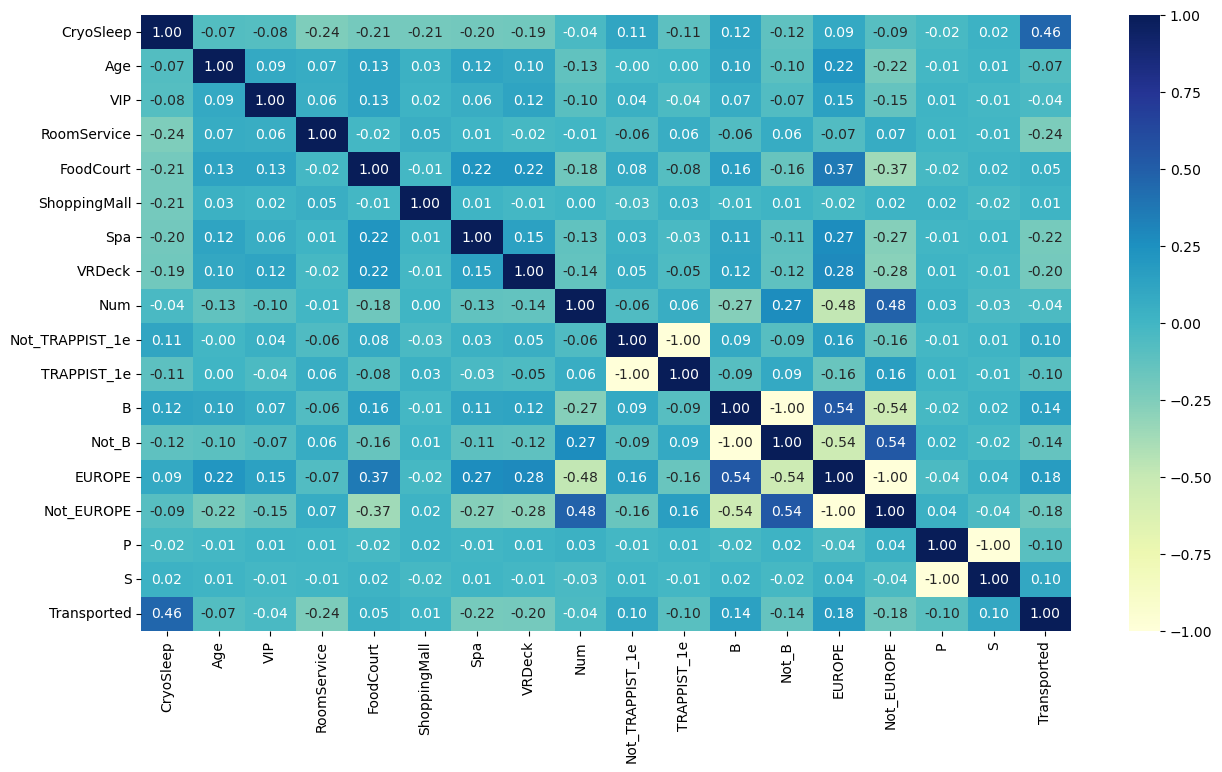

In [60]:
# code here
Col_heat_map = [
'CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck',
    'Num','Not_TRAPPIST_1e','TRAPPIST_1e','B','Not_B','EUROPE',
    'Not_EUROPE','P','S','Transported' ]
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))

sns.heatmap(train[Col_heat_map].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')



Whereas the variables:
<br>
Deck (
<br>
F -0.09
<br>
G 0.02
<br>
E -0.10
<br>
B 0.14
<br>
C 0.11
<br>
D -0.03
<br>
At -0.00
<br>
T -0.01),
<br>
<br>
Destination(
<br>
TRAPPIST-1e  -0.10
<br>
55 Cancri and 0.11
<br>
PSO J318.5-22 0.00
<br>
),<br><br>

HomePlanet
<br>
Earth -0.17
<br>
Europe 0.18
<br>
mars 0.02

<br>
are self-excluding, we will then take the variables with the highest correlation with the Carried variable and use them as a True Variable and the others we will group and use as a non-true variable.
<br>
getting:
<br>
Deck:
<br>
B
<br>
Not_B,
<br><br>
Destination:
<br>
TRAPPIST-1e 
<br>
Not_TRAPPIST-1e <br><br>

HomePlanet:
<br>
Europe
<br>
Not_Europe

In [61]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """Transported ~ CryoSleep+Age+VIP+
                           RoomService+FoodCourt+ShoppingMall+Spa+VRDeck+
                            Num+TRAPPIST_1e+B +EUROPE+S""",
                           data = train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.446566
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.356    
Dependent Variable: Transported      AIC:              7792.0001
Date:               2023-03-08 12:51 BIC:              7890.9839
No. Observations:   8693             Log-Likelihood:   -3882.0  
Df Model:           13               LL-Null:          -6025.3  
Df Residuals:       8679             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -0.3912   0.0992  -3.9433 0.0001 -0.5856 -0.1967
CryoSleep        1.3959   0.0701  19.9061 0.0000  1.2584  1.5333
Age             -0.0076   0.0020  -3.8157 0.0001 -0.0115 -0.0037
VIP             -0.2157   0.2438  -0.8848 0.3762 -0.6935  0.2621
RoomService     -0.0012   0.0001 -14.6707 0.0000 -0.0014 -0.0011
FoodCourt        0.0005   0.0000  13.0847 0.0000  0.0004  0.0006
ShoppingMall     0.0007   0.0001   9.9471 0.0000  0.0005  0.0008
Spa             -0.0019   0.0001 -18.5867 0.0000 -0.0021 -0.0017
VRDeck          -0.0018   0.0001 -18.1278 0.0000 -0.0020 -0.0016
Num              0.0003   0.0001   4.3225 0.0000  0.0001  0.0004
TRAPPIST_1e     -0.1903   0.0632  -3.0124 0.0026 -0.3142 -0.0665
B                0.2897   0.1891   1.5323 0.1254 -0.0809  0.6603
EUROPE           2.1085   0.1334  15.8115 0.0000  1.8471  2.3699
S                0.5477   0.0564   9.7125 0.0000  0.4372  0.6583
================================================================

"""

In [62]:
print('BIC - AIC',7890.9839 - 7792.0001)

BIC - AIC 98.98379999999997


In [63]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """Transported ~ CryoSleep+Age+
                           RoomService+FoodCourt+ShoppingMall+Spa+VRDeck+
                            Num+TRAPPIST_1e+B +EUROPE+S""",
                           data = train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.446612
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.356    
Dependent Variable: Transported      AIC:              7790.7884
Date:               2023-03-08 12:51 BIC:              7882.7019
No. Observations:   8693             Log-Likelihood:   -3882.4  
Df Model:           12               LL-Null:          -6025.3  
Df Residuals:       8680             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -0.3922   0.0992  -3.9538 0.0001 -0.5865 -0.1978
CryoSleep        1.3975   0.0701  19.9339 0.0000  1.2601  1.5349
Age             -0.0077   0.0020  -3.8568 0.0001 -0.0116 -0.0038
RoomService     -0.0012   0.0001 -14.7150 0.0000 -0.0014 -0.0011
FoodCourt        0.0005   0.0000  13.0676 0.0000  0.0004  0.0006
ShoppingMall     0.0007   0.0001   9.9267 0.0000  0.0005  0.0008
Spa             -0.0019   0.0001 -18.6036 0.0000 -0.0021 -0.0017
VRDeck          -0.0018   0.0001 -18.1347 0.0000 -0.0020 -0.0016
Num              0.0003   0.0001   4.3565 0.0000  0.0001  0.0004
TRAPPIST_1e     -0.1900   0.0632  -3.0072 0.0026 -0.3138 -0.0662
B                0.2866   0.1889   1.5172 0.1292 -0.0836  0.6568
EUROPE           2.0998   0.1328  15.8082 0.0000  1.8395  2.3601
S                0.5481   0.0564   9.7196 0.0000  0.4376  0.6587
================================================================

"""

In [64]:
print('BIC - AIC',7882.7019 - 7790.7884)

BIC - AIC 91.91349999999966


In [65]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """Transported ~ CryoSleep+Age+
                           RoomService+FoodCourt+ShoppingMall+Spa+VRDeck+
                            Num+TRAPPIST_1e +EUROPE+S""",
                           data = train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.446746
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.355    
Dependent Variable: Transported      AIC:              7791.1291
Date:               2023-03-08 12:51 BIC:              7875.9723
No. Observations:   8693             Log-Likelihood:   -3883.6  
Df Model:           11               LL-Null:          -6025.3  
Df Residuals:       8681             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -0.3909   0.0992  -3.9406 0.0001 -0.5853 -0.1965
CryoSleep        1.3991   0.0701  19.9580 0.0000  1.2617  1.5365
Age             -0.0076   0.0020  -3.8426 0.0001 -0.0115 -0.0037
RoomService     -0.0012   0.0001 -14.7429 0.0000 -0.0014 -0.0011
FoodCourt        0.0005   0.0000  13.0398 0.0000  0.0004  0.0006
ShoppingMall     0.0007   0.0001   9.9136 0.0000  0.0005  0.0008
Spa             -0.0019   0.0001 -18.6826 0.0000 -0.0021 -0.0017
VRDeck          -0.0018   0.0001 -18.1594 0.0000 -0.0020 -0.0016
Num              0.0003   0.0001   4.3394 0.0000  0.0001  0.0004
TRAPPIST_1e     -0.1907   0.0632  -3.0183 0.0025 -0.3145 -0.0669
EUROPE           2.1952   0.1184  18.5410 0.0000  1.9632  2.4273
S                0.5492   0.0564   9.7385 0.0000  0.4386  0.6597
================================================================

"""

In [66]:
print('BIC - AIC',7875.9723 - 7791.1291)

BIC - AIC 84.84320000000025


In [67]:
# declaring explanatory variables

train_data = train.drop(['Transported'], axis =1 )


# declaring response variable
train_target = train['Transported']
train_data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,EUROPE,Not_EUROPE,Not_TRAPPIST_1e,TRAPPIST_1e,B,Not_B,P,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,1,0,1,0,1,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1,0,1,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1,0,1,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,1,0,1,0,1,0,1


In [68]:
# explanatory sets from last session

# creating a dictionary to store candidate models

train_dict = {

 # full model
 'logit_full'   : [
'CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck',
    'Num','Not_TRAPPIST_1e','TRAPPIST_1e','B','Not_B','EUROPE',
    'Not_EUROPE','P','S' ],
 

# significant variables only (set 1)
 'logit_sig_1' : ['CryoSleep','Age','VIP','RoomService','FoodCourt',
                  'ShoppingMall','Spa','VRDeck','Num','TRAPPIST_1e',
                  'B ','EUROPE','S'],
    
 # significant variables only (set 2)
 'logit_sig_2'  : [ 'CryoSleep','Age','RoomService','FoodCourt',
                   'ShoppingMall','Spa','VRDeck','Num','TRAPPIST_1e',
                   'EUROPE','S']

}

logit_sig_2 = [ 'CryoSleep','Age','RoomService','FoodCourt',
                   'ShoppingMall','Spa','VRDeck','Num','TRAPPIST_1e',
                   'EUROPE','S']

In [69]:
# preparing x-variables
x_data = train.loc[ : , logit_sig_2 ] # x-variables (can change this) or reduced_x 
# x_data = housing.drop(['Sale_Price', 'log_Sale_Price'], axis = 1)


# preparing y-variable
y_data = train.loc[ : , 'Transported']    # y-variable
#y_data = housing.loc[ : , 'logSale_Price'] # y-variable


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 419 )

# Gradient Boosting Classifier

In [70]:
from sklearn.metrics import accuracy_score
# specifying a model name
model_name = 'Gradient Boosting Classifier'

# train/test split with the full model
train_data   =  train.loc[ : , train_dict['logit_sig_2']]
train_target =  train.loc[ : , 'Transported']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            train_data,   #x-data
            train_target,  #y-data
            test_size    = 0.25,
            random_state = 419,
            stratify     = train_target) # preserving balance


# INSTANTIATING a logistic regression model
# Initialize a GradientBoostingClassifier with default parameters
GBC = GradientBoostingClassifier(random_state=419,max_depth = 8)



# FITTING the training data
GBC_fit = GBC.fit(x_train, y_train)


# PREDICTING based on the testing set
GBC_pred = GBC_fit.predict(x_test)


# saving scoring data for future use
GBC_train_score = GBC_fit.score(x_train, y_train).round(4) # accuracy
GBC_test_score  = GBC_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
GBC_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = GBC_pred).round(4) # auc

accuracy = accuracy_score(y_true = y_test, y_pred =GBC_pred )

# SCORING the results
print('Model Type :', model_name)

print('Explanatory Variable Sets : logit_sig_2' )

print('Training ACCURACY:', GBC_fit.score(x_train, y_train).round(4))

print('Testing  ACCURACY:', GBC_fit.score(x_test, y_test).round(4))

print('Model GAP:', abs(GBC_train_score - GBC_test_score).round(4))

print('Model Accuracy: ', accuracy.round(4))

print('Full AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = GBC_pred).round(4))




Model Type : Gradient Boosting Classifier
Explanatory Variable Sets : logit_sig_2
Training ACCURACY: 0.954
Testing  ACCURACY: 0.7925
Model GAP: 0.1615
Model Accuracy:  0.7925
Full AUC Score: 0.7926


In [71]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

In [72]:
# declaring a ranges for GradientBoostingRegressor:

# 1 - n_estimators range :

estimator_range_gb =  range(1, 102, 5)   


# 2 - max_depth range:

depth_range      = range(1, 9, 1) 

# 3 - learning_rate range:

learning_rate_range  =  range(1, 11, 5) 

# 4 - subsample range:

sample_range = range(1, 11, 2)

# 5 - min_samples_split range:

min_sample_range = range(1, 11, 2)

# 6 - max_features range:

features_range = ['auto', 'sqrt', 'log2']

# to print the number  of models

hyperparams_GradientBoostingClassifier = len(estimator_range_gb)*len(depth_range)*len(learning_rate_range)*len(sample_range)*len(min_sample_range)*len(features_range)

print(f'''Number of models for Gradient Boosting Regressor: {hyperparams_GradientBoostingClassifier}''')

Number of models for Gradient Boosting Regressor: 25200


In [73]:
# declaring a hyperparameter space - RandomForestRegressor 

#n_estimators

estimator_range_gb =  range(1, 102, 5)   

#max_depth
depth_range      = range(1, 9, 1) 

#learning_rate range:

learning_rate_range  =  range(1, 11, 5) 

#Subsample range:

sample_range = range(1, 11, 2)

# min_samples_split range:

min_sample_range = range(1, 11, 2)

# max_features range:

features_range = ['auto', 'sqrt', 'log2']

# MODEL_YOU_ARE_TUNING = 

# creating a hyperparameter grid
param_grid_GBC = {'n_estimators'     : estimator_range_gb,
                  'max_depth'        : depth_range,
                  'learning_rate'        : learning_rate_range,
                  'subsample' : sample_range,
                  'min_samples_split' : min_sample_range,
                  'max_features':features_range
                 }


In [74]:
# import time              # to check the time of execution
# from sklearn.model_selection import RandomizedSearchCV 

# start_time = time.time() 
# # INSTANTIATING the model object without hyperparameters
# model = GradientBoostingClassifier()



# # RandomizedSearchCV object
# model_cv = RandomizedSearchCV(estimator           = model,
#                               param_distributions = param_grid_GBC,
#                               n_iter              = 1000,
#                               cv                  = 3,
#                               random_state        = 419)



# # FITTING to the FULL DATASET (due to cross-validation)
# model_cv.fit(x_data, y_data)


# # printing the optimal parameters and best score
# print(f"Tuned Parameters: {model_cv.best_params_}")
# print(f"Tuned R-Square:   {model_cv.best_score_}")

# end_time = time.time()

# total_time = end_time - start_time
# print(f"\nTotal processing time: {total_time} seconds")

In [75]:
from sklearn.metrics import accuracy_score
# specifying a model name
model_name = 'Gradient Boosting Classifier'

# train/test split with the full model
train_data   =  train.loc[ : , train_dict['logit_sig_2']]
train_target =  train.loc[ : , 'Transported']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            train_data,   #x-data
            train_target,  #y-data
            test_size    = 0.25,
            random_state = 419,
            stratify     = train_target) # preserving balance


# INSTANTIATING a logistic regression model
# Initialize a GradientBoostingClassifier with default parameters
GBC = GradientBoostingClassifier(subsample = 1, n_estimators = 31, 
                                 min_samples_split = 7, max_features = 'auto', 
                                 max_depth = 1, learning_rate = 1,
                                 random_state=419)



# FITTING the training data
GBC_fit = GBC.fit(x_train, y_train)


# PREDICTING based on the testing set
GBC_pred = GBC_fit.predict(x_test)


# saving scoring data for future use
GBC_train_score = GBC_fit.score(x_train, y_train).round(4) # accuracy
GBC_test_score  = GBC_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
GBC_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = GBC_pred).round(4) # auc

accuracy = accuracy_score(y_true = y_test, y_pred =GBC_pred )

# SCORING the results
print('Model Type :', model_name)

print('Explanatory Variable Sets : logit_sig_2' )

print('Training ACCURACY:', GBC_fit.score(x_train, y_train).round(4))

print('Testing  ACCURACY:', GBC_fit.score(x_test, y_test).round(4))

print('Model GAP:', abs(GBC_train_score - GBC_test_score).round(4))

print('Model Accuracy: ', accuracy.round(4))

print('Full AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = GBC_pred).round(4))




D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  war

Model Type : Gradient Boosting Classifier
Explanatory Variable Sets : logit_sig_2
Training ACCURACY: 0.799
Testing  ACCURACY: 0.7944
Model GAP: 0.0046
Model Accuracy:  0.7944
Full AUC Score: 0.7943


D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  war

# KNeighbors Classifier

In [76]:
from sklearn.metrics import accuracy_score
# specifying a model name
model_name = 'KNeighbors Classifier'

# train/test split with the full model
train_data   =  train.loc[ : , train_dict['logit_sig_2']]
train_target =  train.loc[ : , 'Transported']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            train_data,   #x-data
            train_target,  #y-data
            test_size    = 0.25,
            random_state = 419,
            stratify     = train_target) # preserving balance


# INSTANTIATING a logistic regression model
# Initialize a GradientBoostingClassifier with default parameters
KNC = KNeighborsClassifier()



# FITTING the training data
KNC_fit = KNC.fit(x_train, y_train)


# PREDICTING based on the testing set
KNC_pred = KNC_fit.predict(x_test)


# saving scoring data for future use
KNC_train_score = KNC_fit.score(x_train, y_train).round(4) # accuracy
KNC_test_score  = KNC_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
KNC_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = KNC_pred).round(4) # auc

accuracy = accuracy_score(y_true = y_test, y_pred =KNC_pred )

# SCORING the results
print('Model Type :', model_name)

print('Explanatory Variable Sets : logit_sig_2' )

print('Training ACCURACY:', KNC_fit.score(x_train, y_train).round(4))

print('Testing  ACCURACY:', KNC_fit.score(x_test, y_test).round(4))

print('Model GAP:', abs(KNC_train_score - KNC_test_score).round(4))

print('Model Accuracy: ', accuracy.round(4))

print('Full AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = KNC_pred).round(4))




Model Type : KNeighbors Classifier
Explanatory Variable Sets : logit_sig_2
Training ACCURACY: 0.8234
Testing  ACCURACY: 0.7654
Model GAP: 0.058
Model Accuracy:  0.7654
Full AUC Score: 0.7652


# Logistic Regression

In [77]:
from sklearn.metrics import accuracy_score
# specifying a model name
model_name = 'Logistic Regression'

# train/test split with the full model
train_data   =  train.loc[ : , train_dict['logit_sig_2']]
train_target =  train.loc[ : , 'Transported']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            train_data,   #x-data
            train_target,  #y-data
            test_size    = 0.25,
            random_state = 419,
            stratify     = train_target) # preserving balance


# INSTANTIATING a logistic regression model
# Initialize a GradientBoostingClassifier with default parameters
logreg = LogisticRegression(solver = 'lbfgs',
                            max_iter = 1000,
                            C = 1,
                            random_state = 419)



# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
logreg_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = logreg_pred).round(4) # auc

accuracy = accuracy_score(y_true = y_test, y_pred =logreg_pred )

# SCORING the results
print('Model Type :', model_name)

print('Explanatory Variable Sets : logit_sig_2' )

print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))

print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

print('Model GAP:', abs(logreg_train_score - logreg_test_score).round(4))

print('Model Accuracy: ', accuracy.round(4))

print('Full AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = logreg_pred).round(4))




Model Type : Logistic Regression
Explanatory Variable Sets : logit_sig_2
Training ACCURACY: 0.7937
Testing  ACCURACY: 0.7971
Model GAP: 0.0034
Model Accuracy:  0.7971
Full AUC Score: 0.797


# Decision Tree Classifier

In [78]:
from sklearn.metrics import accuracy_score
# specifying a model name
model_name = 'Decision Tree Classifier'

# train/test split with the full model
train_data   =  train.loc[ : , train_dict['logit_sig_2']]
train_target =  train.loc[ : , 'Transported']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            train_data,   #x-data
            train_target,  #y-data
            test_size    = 0.25,
            random_state = 419,
            stratify     = train_target) # preserving balance


# INSTANTIATING a logistic regression model
# Initialize a GradientBoostingClassifier with default parameters
DTC = DecisionTreeClassifier(random_state=419,max_depth = 8)



# FITTING the training data
DTC_fit = DTC.fit(x_train, y_train)


# PREDICTING based on the testing set
DTC_pred = DTC_fit.predict(x_test)


# saving scoring data for future use
DTC_train_score = DTC_fit.score(x_train, y_train).round(4) # accuracy
DTC_test_score  = DTC_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
DTC_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = DTC_pred).round(4) # auc

accuracy = accuracy_score(y_true = y_test, y_pred =DTC_pred )

# SCORING the results
print('Model Type :', model_name)

print('Explanatory Variable Sets : logit_sig_2' )

print('Training ACCURACY:', DTC_fit.score(x_train, y_train).round(4))

print('Testing  ACCURACY:', DTC_fit.score(x_test, y_test).round(4))

print('Model GAP:', abs(DTC_train_score - DTC_test_score).round(4))

print('Model Accuracy: ', accuracy.round(4))

print('Full AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = DTC_pred).round(4))




Model Type : Decision Tree Classifier
Explanatory Variable Sets : logit_sig_2
Training ACCURACY: 0.8052
Testing  ACCURACY: 0.7654
Model GAP: 0.0398
Model Accuracy:  0.7654
Full AUC Score: 0.7659


# Random Forest

In [79]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [125]:
from sklearn.metrics import accuracy_score
# specifying a model name
model_name = 'Random Forest Classifier'

# train/test split with the full model
train_data   =  train.loc[ : , train_dict['logit_sig_2']]
train_target =  train.loc[ : , 'Transported']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            train_data,   #x-data
            train_target,  #y-data
            test_size    = 0.25,
            random_state = 419,
            stratify     = train_target) # preserving balance


# INSTANTIATING a logistic regression model
# Initialize a GradientBoostingClassifier with default parameters
RFC = RandomForestClassifier(random_state=219,max_depth = 8)



# FITTING the training data
RFC_fit = RFC.fit(x_train, y_train)


# PREDICTING based on the testing set
RFC_pred = RFC_fit.predict(x_test)


# saving scoring data for future use
RFC_train_score = RFC_fit.score(x_train, y_train).round(4) # accuracy
RFC_test_score  = RFC_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
RFC_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = RFC_pred).round(4) # auc

accuracy = accuracy_score(y_true = y_test, y_pred =RFC_pred )

# SCORING the results
print('Model Type :', model_name)

print('Explanatory Variable Sets : logit_sig_2' )

print('Training ACCURACY:', RFC_fit.score(x_train, y_train).round(4))

print('Testing  ACCURACY:', RFC_fit.score(x_test, y_test).round(4))

print('Model GAP:', abs(RFC_train_score - RFC_test_score).round(4))

print('Model Accuracy: ', accuracy.round(4))

print('Full AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = RFC_pred).round(4))




Model Type : Random Forest Classifier
Explanatory Variable Sets : logit_sig_2
Training ACCURACY: 0.8283
Testing  ACCURACY: 0.8004
Model GAP: 0.0279
Model Accuracy:  0.8004
Full AUC Score: 0.8003


In [81]:
# declaring a ranges for GradientBoostingRegressor:

# 1 - n_estimators range :

estimator_range_gb =  range(1, 102, 5)   


# 2 - max_depth range:

depth_range      = range(1, 11, 2) 

# 3 - min_sample_split range:

sample_split_range  =  range(1, 11, 2) 

# 4 - min_sample_leaf range:

sample_leaf_range = range(1, 11, 2) 


# 5 - max_features range:

features_range = ["sqrt", "log2", None]



# to print the number  of models

hyperparams_RandomForestClassifier = len(estimator_range_gb)*len(depth_range)*len(sample_split_range)*len(sample_leaf_range)*len(features_range)

print(f'''Number of models for Gradient Boosting Regressor: {hyperparams_RandomForestClassifier}''')


Number of models for Gradient Boosting Regressor: 7875


In [82]:
# declaring a hyperparameter space - RandomForestRegressor 

# 1 - n_estimators range :
estimator_range_gb =  range(1, 102, 5)   
# 2 - max_depth range:
depth_range      = range(1, 11, 2) 
# 3 - min_sample_split range:
sample_split_range  =  range(1, 11, 2) 
# 4 - min_sample_leaf range:
sample_leaf_range = range(1, 11, 2) 
# 5 - max_features range:
features_range = ["sqrt", "log2", None]

# MODEL_YOU_ARE_TUNING = 

# creating a hyperparameter grid
param_grid_RFC = {'n_estimators'     : estimator_range_gb,
                  'max_depth'        : depth_range,
                  'min_samples_split'        : sample_split_range,
                  'min_samples_leaf' : sample_leaf_range,
                  'max_features' : features_range
                 }

In [83]:
# import time              # to check the time of execution
# from sklearn.model_selection import RandomizedSearchCV 

# start_time = time.time() 
# # INSTANTIATING the model object without hyperparameters
# model = RandomForestClassifier()



# # RandomizedSearchCV object
# model_cv = RandomizedSearchCV(estimator           = model,
#                               param_distributions = param_grid_RFC,
#                               n_iter              = 7875,
#                               cv                  = 3,
#                               random_state        = 419)



# # FITTING to the FULL DATASET (due to cross-validation)
# model_cv.fit(x_data, y_data)


# # printing the optimal parameters and best score
# print(f"Tuned Parameters: {model_cv.best_params_}")
# print(f"Tuned R-Square:   {model_cv.best_score_}")

# end_time = time.time()

# total_time = end_time - start_time
# print(f"\nTotal processing time: {total_time} seconds")


In [84]:
from sklearn.metrics import accuracy_score
# specifying a model name
model_name = 'Random Forest Classifier - Tunned'

# train/test split with the full model
train_data   =  train.loc[ : , train_dict['logit_sig_2']]
train_target =  train.loc[ : , 'Transported']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            train_data,   #x-data
            train_target,  #y-data
            test_size    = 0.25,
            random_state = 419,
            stratify     = train_target) # preserving balance


# INSTANTIATING a logistic regression model
# Initialize a GradientBoostingClassifier with default parameters
RFC_tun = RandomForestClassifier( random_state = 419, 
                              n_estimators = 96, 
                              min_samples_split = 5,
                              min_samples_leaf = 7, 
                              max_features = 'log2',
                              max_depth = 8)



# FITTING the training data
RFC_tun_fit = RFC_tun.fit(x_train, y_train)


# PREDICTING based on the testing set
RFC_tun_pred = RFC_tun_fit.predict(x_test)


# saving scoring data for future use
RFC_tun_train_score = RFC_tun_fit.score(x_train, y_train).round(4) # accuracy
RFC_tun_test_score  = RFC_tun_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
RFC_tun_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = RFC_tun_pred).round(4) # auc

accuracy = accuracy_score(y_true = y_test, y_pred =RFC_tun_pred )

# SCORING the results
print('Model Type :', model_name)

print('Explanatory Variable Sets : logit_sig_2' )

print('Training ACCURACY:', RFC_tun_fit.score(x_train, y_train).round(4))

print('Testing  ACCURACY:', RFC_tun_fit.score(x_test, y_test).round(4))

print('Model GAP:', abs(RFC_tun_train_score - RFC_test_score).round(4))

print('Model Accuracy: ', accuracy.round(4))

print('Full AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = RFC_tun_pred).round(4))




Model Type : Random Forest Classifier - Tunned
Explanatory Variable Sets : logit_sig_2
Training ACCURACY: 0.8201
Testing  ACCURACY: 0.7981
Model GAP: 0.0188
Model Accuracy:  0.7981
Full AUC Score: 0.798


In [85]:
# model_cv.cv_results_

In [86]:
# #model_cv.cv_results_
# def tuning_results(cv_results, n=5):
#     """
# This function will display the top "n" models from hyperparameter tuning,
# based on "rank_test_score".

# PARAMETERS
# ----------
# cv_results = results dictionary from the attribute ".cv_results_"
# n          = number of models to display
#     """
#     param_lst = []

#     for result in cv_results["params"]:
#         result = str(result).replace(":", "=")
#         param_lst.append(result[1:-1])


#     results_df = pd.DataFrame(data = {
#         "Model_Rank" : cv_results["rank_test_score"],
#         "Mean_Test_Score" : cv_results["mean_test_score"],
#         "SD_Test_Score" : cv_results["std_test_score"],
#         "Parameters" : param_lst
#     })


#     results_df = results_df.sort_values(by = "Model_Rank", axis = 0)
#     return results_df.head(n = n)

In [87]:
# # run tuning_results() on the hyperparameter tuning results
# tuning_results(cv_results = model_cv.cv_results_, n = 5)

# Ridge Classifier 

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
# specifying a model name
model_name = 'Ridge Classifier'

# train/test split with the full model
train_data   =  train.loc[ : , train_dict['logit_sig_2']]
train_target =  train.loc[ : , 'Transported']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            train_data,   #x-data
            train_target,  #y-data
            test_size    = 0.25,
            random_state = 419,
            stratify     = train_target) # preserving balance


# INSTANTIATING a logistic regression model
# Initialize a GradientBoostingClassifier with default parameters
RC = RidgeClassifier(random_state=419)



# FITTING the training data
RC_fit = RC.fit(x_train, y_train)


# PREDICTING based on the testing set
RC_pred = RC_fit.predict(x_test)


# saving scoring data for future use
RC_train_score = RC_fit.score(x_train, y_train).round(4) # accuracy
RC_test_score  = RC_fit.score(x_test, y_test).round(4) # accuracy

# saving AUC
RC_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = RC_pred).round(4) # auc

accuracy = accuracy_score(y_true = y_test, y_pred =RC_pred )

# SCORING the results
print('Model Type :', model_name)

print('Explanatory Variable Sets : logit_sig_2' )

print('Training ACCURACY:', RC_fit.score(x_train, y_train).round(4))

print('Testing  ACCURACY:', RC_fit.score(x_test, y_test).round(4))

print('Model GAP:', abs(RC_train_score - RC_test_score).round(4))

print('Model Accuracy: ', accuracy.round(4))

print('Full AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = RC_pred).round(4))



Model Type : Ridge Classifier
Explanatory Variable Sets : logit_sig_2
Training ACCURACY: 0.7615
Testing  ACCURACY: 0.7718
Model GAP: 0.0103
Model Accuracy:  0.7718
Full AUC Score: 0.7724


In [89]:

# comparing results
print(f"""
Model                          AUC Score                 Model_GAP                  
-----                          ---------                 ---------                 
Logistic                       {logreg_auc_score}                     {abs(logreg_train_score - logreg_test_score).round(4)} 
KNeighbors Classifier          {KNC_auc_score}                    {abs(KNC_train_score - KNC_test_score).round(4)}          
Decision Tree Classifier       {DTC_auc_score}                    {abs(DTC_train_score - DTC_test_score).round(4)}          
Gradient Boosting Classifier   {GBC_auc_score}                    {abs(GBC_train_score - GBC_test_score).round(4)}          
Random Forest Classifier       {RFC_auc_score}                    {abs(RFC_train_score - RFC_test_score).round(4)}          
Ridge Classifier               {RC_auc_score}                    {abs(RC_train_score - RC_test_score).round(4)}   
Random Forest Tun              {RFC_tun_auc_score}                     {abs(RFC_tun_train_score - RFC_tun_test_score).round(4)}""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'KNeighbors Classifier', 'Decision Tree Classifier ','Gradient Boosting Classifier ','Random Forest Classifier','Ridge Classifier','Random Forest Tun '],
           
    'AUC Score' : [logreg_auc_score,
                   KNC_auc_score, DTC_auc_score,
                   GBC_auc_score,RFC_auc_score,RC_auc_score,RFC_tun_auc_score
                  ],
    'Model GAP' : [logreg_train_score - logreg_test_score, KNC_train_score - KNC_test_score,
                   DTC_train_score - DTC_test_score,GBC_train_score - GBC_test_score,
                    RFC_train_score - RFC_test_score, RC_train_score - RC_test_score,RFC_tun_train_score - RFC_tun_test_score
                  ],
    
    'Training Accuracy' : [logreg_train_score, KNC_train_score,
                           DTC_train_score,GBC_train_score,RFC_train_score,RC_train_score,RFC_tun_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, KNC_test_score,
                           DTC_test_score,GBC_test_score,RFC_test_score,RC_test_score,RFC_tun_test_score]}

#     'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
#                            (KNC_tn, KNC_fp, KNC_fn, KNC_tp),
#                            (DTC_tn, DTC_fp, DTC_fn, DTC_tp),
#                           (GBC_tn, GBC_fp, GBC_fn, GBC_tp),
#                           (RFC_tn, RFC_fp, RFC_fn, RFC_tp),
#                           (RC_tn, RC_fp, RC_fn, RC_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__results/classification_model_performance.xlsx',
                           index = False)


Model                          AUC Score                 Model_GAP                  
-----                          ---------                 ---------                 
Logistic                       0.797                     0.0034 
KNeighbors Classifier          0.7652                    0.058          
Decision Tree Classifier       0.7659                    0.0398          
Gradient Boosting Classifier   0.7943                    0.0046          
Random Forest Classifier       0.8012                     0.0293          
Ridge Classifier               0.7724                    0.0103   
Random Forest Tun              0.798                     0.022


<br><br>
<h3>Part X - I: The Confusion Matrix</h3><br>
At this stage, we can see how the algorithm is generating the confusion matrix for us, that is, how much "hit" and "mistake" the model had when predicting the model's classification.
The confusion matrix in Python can be read as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
  (incorrect)      |  (correct)
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~
                                                      |
  PREDICTED: TRAPORTED BY ANOMALY     (TRAPORTED=1)   |  PREDICTED: NOT TRAPORTED BY ANOMALY        (TRAPORTED=0)
  ACTUAL:    TRAPORTED BY ANOMALY     (TRAPORTED=1)   |  ACTUAL:    TRAPORTED BY ANOMALY            (TRAPORTED=1)
                                                      |
------------------------------------------------------|----------------------------------------------------------
                                                      |
  PREDICTED: TRAPORTED BY ANOMALY     (TRAPORTED=1)   |  PREDICTED: NOT TRAPORTED BY ANOMALY        (TRAPORTED=0)
  ACTUAL:    NOT TRAPORTED BY ANOMALY (TRAPORTED=0)   |  ACTUAL:    NOT TRAPORTED BY ANOMALY        (TRAPORTED=0)
                                                      |  
~~~


In [90]:
# creating a confusion matrix - Random forest classifier - Explanatory Variable Sets : logit_sig_1
print(confusion_matrix(y_true = y_test,
                       y_pred = RFC_pred   ))

[[855 224]
 [208 887]]


In [91]:
# unpacking the confusion matrix - Random forest classifier - Explanatory Variable Sets : logit_sig_1
RFC_tn, \
RFC_fp, \
RFC_fn, \
RFC_tp = confusion_matrix(y_true = y_test, y_pred = RFC_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {RFC_tn}
False Positives: {RFC_fp}
False Negatives: {RFC_fn}
True Positives : {RFC_tp}
""")


True Negatives : 855
False Positives: 224
False Negatives: 208
True Positives : 887



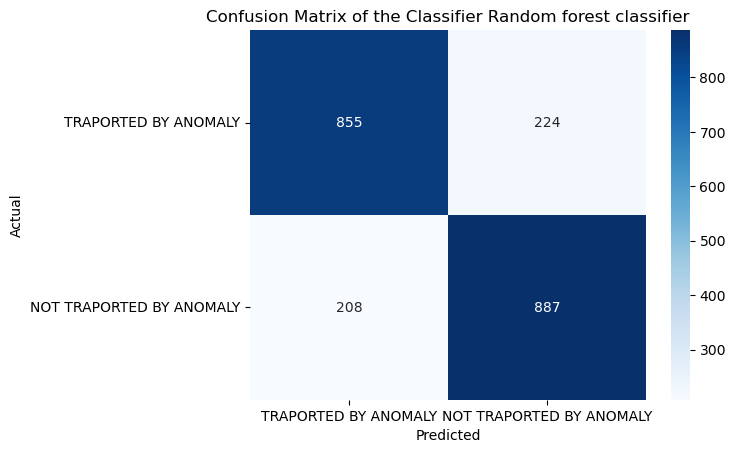

In [92]:
# calling the visual_cm function Random forest classifier - Explanatory Variable Sets : logit_sig_2
visual_cm(model_name = 'Random forest classifier',
          true_y = y_test,
          pred_y = RFC_pred ,
          labels = ['TRAPORTED BY ANOMALY', 'NOT TRAPORTED BY ANOMALY'])

<br>

# Test File

In [93]:
test_file = './__datasets/test.csv'
test_df = pd.read_csv(test_file)


In [94]:
#count of unique values
test_df.nunique()
#count of null values
test_df.isnull().sum(axis = 0)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [95]:


continous_variables = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
median = test_df[continous_variables].median()
median


Age             26.0
RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
dtype: float64

In [96]:
test_df[continous_variables] = test_df[continous_variables].fillna(median)
test_df.isna().sum()



PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [97]:
categorical_variables = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
mode = test_df[categorical_variables].mode().iloc[0]


In [98]:
test_df[categorical_variables] = test_df[categorical_variables].fillna(mode)
test_df.isna().sum()


PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [99]:

test_df = test_df.drop("Name", axis=1)
test_df.head(5)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [100]:
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split("/", expand = True) #from the File and Data Field Descriptions
                                                                              #side can be either P for Port or S for Starboard.
test_df


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,G,160,P
4274,9271_01,Mars,True,D/296/P,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,26.0,False,0.0,2680.0,0.0,0.0,523.0,D,297,P


In [101]:
test_df = test_df.drop("Cabin", axis=1)
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,G,160,P
4274,9271_01,Mars,True,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,D,296,P
4275,9273_01,Europa,False,TRAPPIST-1e,26.0,False,0.0,2680.0,0.0,0.0,523.0,D,297,P


In [102]:
# A succinct way to convert a single column of boolean values to a column of integers 1 or 0:
# from:https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
True_False = ['CryoSleep','VIP']
test_df[True_False] = test_df[True_False].astype(int)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,5,S


In [103]:
numeric_columns = ['CryoSleep','FoodCourt','ShoppingMall', 'VIP','Age' ,'VRDeck' ,'Spa','RoomService']


In [104]:
#HomePlanet
#Destination
#Deck
#Side
test_df['HomePlanet'].value_counts()

Earth     2350
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [105]:
# email domain types
EUROPE = ['Europa']
Not_EUROPE =['Earth','Mars']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in test_df['HomePlanet']:
    
    if domain in EUROPE:
        placeholder_lst.append('EUROPE')
    elif domain in Not_EUROPE:
        placeholder_lst.append('Not_EUROPE')

    else:
          #  print('Unknown',domain )
             print('Unknown')

# concatenating with original DataFrame
test_df['HomePlanet'] = pd.Series(placeholder_lst)

# checking results
test_df['HomePlanet'].value_counts()



# one hot encoding categorical variables
DF_HomePlanet    = pd.get_dummies(test_df['HomePlanet'])

# dropping categorical variables after they've been encoded


# joining codings together
test_df = test_df.join([DF_HomePlanet])


test_df = test_df.drop('HomePlanet', axis = 1)


In [106]:

test_df['Destination'].value_counts()



# email domain types
TRAPPIST_1e = ['TRAPPIST-1e']
Not_TRAPPIST_1e =['55 Cancri e','PSO J318.5-22']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in test_df['Destination']:
    
    if domain in TRAPPIST_1e:
        placeholder_lst.append('TRAPPIST_1e')
    elif domain in Not_TRAPPIST_1e:
        placeholder_lst.append('Not_TRAPPIST_1e')

    else:
          #  print('Unknown',domain )
             print('Unknown')

# concatenating with original DataFrame
test_df['Destination'] = pd.Series(placeholder_lst)

# checking results
test_df['Destination'].value_counts()




# one hot encoding categorical variables
DF_Destination    = pd.get_dummies(test_df['Destination'])

# dropping categorical variables after they've been encoded


# joining codings together
test_df = test_df.join([DF_Destination])


test_df = test_df.drop('Destination', axis = 1)



In [107]:
test_df['Deck'].value_counts()

F    1445
G    1322
E     447
B     362
C     355
D     242
A      98
T       6
Name: Deck, dtype: int64

In [108]:







# email domain types
B = ['B']
Not_B =['A','C','D','E','F','G','T']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in test_df['Deck']:
    
    if domain in B:
        placeholder_lst.append('B')
    elif domain in Not_B:
        placeholder_lst.append('Not_B')

    else:
          #  print('Unknown',domain )
             print('Unknown')

# concatenating with original DataFrame
test_df['Deck'] = pd.Series(placeholder_lst)

# checking results
test_df['Deck'].value_counts()






Not_B    3915
B         362
Name: Deck, dtype: int64

In [109]:
# one hot encoding categorical variables
DF_Deck    = pd.get_dummies(test_df['Deck'])

# dropping categorical variables after they've been encoded



In [110]:

# joining codings together
test_df = test_df.join([DF_Deck])


In [111]:


test_df = test_df.drop('Deck', axis = 1)

In [112]:
test_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Side,EUROPE,Not_EUROPE,Not_TRAPPIST_1e,TRAPPIST_1e,B,Not_B
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,S,0,1,0,1,0,1
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,S,0,1,0,1,0,1
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,S,1,0,1,0,0,1
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,S,1,0,0,1,0,1
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,S,0,1,0,1,0,1


In [113]:


test_df['Side'].value_counts()




DF_Side= pd.get_dummies(test_df['Side'])

# dropping categorical variables after they've been encoded


# joining codings together
test_df = test_df.join([DF_Side])




In [114]:
test_df['Num'] = test_df['Num'].astype(int)

In [115]:
# test_df = test_df.drop('PassengerId', axis=1)

In [116]:
test_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Side,EUROPE,Not_EUROPE,Not_TRAPPIST_1e,TRAPPIST_1e,B,Not_B,P,S
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,S,0,1,0,1,0,1,0,1
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,S,0,1,0,1,0,1,0,1
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,S,1,0,1,0,0,1,0,1
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,S,1,0,0,1,0,1,0,1
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,S,0,1,0,1,0,1,0,1


In [117]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,EUROPE,Not_EUROPE,Not_TRAPPIST_1e,TRAPPIST_1e,B,Not_B,P,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,1,0,1,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,1,0,1,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,1,0,1,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,1,0,1,0,1,0,1


In [118]:
train['set'] = 'Training'
test_df ['set'] = 'Testing'

In [119]:
x_train = train[ [ 'CryoSleep','Age','RoomService','FoodCourt',
                   'ShoppingMall','Spa','VRDeck','Num','TRAPPIST_1e',
                   'EUROPE','S'] ][ train['set'] == 'Training' ]

# setting response variable
y_train = train[ 'Transported' ][ train['set']   == 'Training' ]

In [120]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,EUROPE,Not_EUROPE,Not_TRAPPIST_1e,TRAPPIST_1e,B,Not_B,P,S,set
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,1,0,1,0,Training
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,1,0,1,0,1,Training
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,1,0,1,0,1,Training
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,1,0,1,0,1,Training
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,1,0,1,0,1,0,1,Training


In [121]:
test_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Side,EUROPE,Not_EUROPE,Not_TRAPPIST_1e,TRAPPIST_1e,B,Not_B,P,S,set
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,S,0,1,0,1,0,1,0,1,Testing
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,S,0,1,0,1,0,1,0,1,Testing
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,S,1,0,1,0,0,1,0,1,Testing
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,S,1,0,0,1,0,1,0,1,Testing
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,S,0,1,0,1,0,1,0,1,Testing


In [122]:
# setting x_test
x_test  = test_df[ [ 'CryoSleep','Age','RoomService','FoodCourt',
                   'ShoppingMall','Spa','VRDeck','Num','TRAPPIST_1e',
                   'EUROPE','S'] ][ test_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = RFC.predict(x_test)

# checking results
model_pred

array([1, 0, 1, ..., 1, 1, 1])

In [123]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'PassengerId' : test_df['PassengerId'],
                                    'Transported' : model_pred.astype(bool)               } )

# checking the results
predictions.head(n = 5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [124]:
predictions.to_csv(path_or_buf = 'submission.csv',
                   index = False)

end_time = time.time()

total_time = end_time - start_time
print(f"\nTotal processing time: {total_time} seconds")


Total processing time: 28.3823459148407 seconds
